# Problem Statement

An ellipse $E(a, b)$ is given at its initial position by equation:
$\frac {x^2} {a^2} + \frac {(y - b)^2} {b^2} = 1$

The ellipse rolls without slipping along the $x$ axis for one complete turn. Interestingly, the length of the curve generated by a focus is independent from the size of the minor axis:<
$F(a,b) =  2 \pi \max(a,b)$

This is not true for the curve generated by the ellipse center. Let $C(a, b)$ be the length of the curve generated by the center of the ellipse as it rolls without slipping for one turn.

You are given $C(2, 4) \approx 21.38816906$.

Find $C(1, 4) + C(3, 4)$. Give your answer rounded to $8$ digits behind the decimal point in the form <i>ab.cdefghij</i>.

# Support Function Approach

Let us denote the ellipse centered at the origin, whose axes coincide with the coordinate axes, by

$$ \frac{x^2}{a^2} + \frac{y^2}{b^2}=1 $$

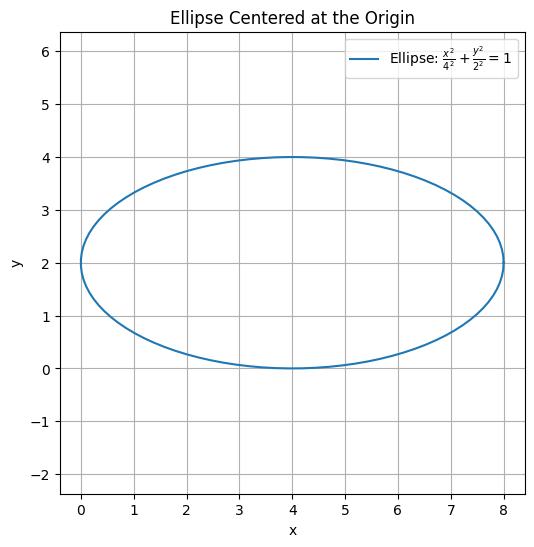

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the ellipse
a = 4  # semi-major axis
b = 2  # semi-minor axis

# Generate parametric equations for the ellipse
theta = np.linspace(0, 2 * np.pi, 100)  # angles from 0 to 2pi
x = a * np.cos(theta) + a # x = a * cos(t)
y = b * np.sin(theta) + b # y = b * sin(t)

# Create the plot
plt.figure(figsize=(6, 6))
plt.plot(x, y, label=f'Ellipse: $\\frac{{x^2}}{{{a}^2}} + \\frac{{y^2}}{{{b}^2}} = 1$')

# Set equal aspect ratio to ensure the ellipse isn't distorted
plt.axis('equal')

# Add labels, title, and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ellipse Centered at the Origin')
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()

# Support Function

## Definition of the Support Function

Given a non-empty set $S \subseteq \mathbb{R}^n$, the support function of $S$, denoted $h_{s}:\mathbb{R}^n \to \mathbb{R} \cup \{+\infty\}$, is defnied as:

$$ h_{s} = sup <x, u> $$

where:
- $<x,u>$ is the inner product of vectors $x\in S$ and $u \in \mathbb{R}^n$,
- $sup$ denotes the supremum over all $x \in S$,
- $u$ is a direction vector in $\mathbb{R}^n$.

The support function $h_{s}(u)$ gives the signed distance from the origin to the hyperplane tangent $S$ in the direction $u$, maximized over all points in $S$. If $S$ convex, closed and bounded, the supremum is attained and $h_{s}(u)$ is finite for all $u$.

## Properties

1. **Convexity**: $h_{s}$ is convex, lower semicontinouos, and positively homogeneous of degree $1$, i.e., $h_{s}(\lambda u) = \lambda h_{s}(u)$ for $\lambda >0$.
2. **Characterization of Convex Sets**: If $S$ is a closed convex set, the support function uniquely determines $S$. Specifically, $S$ can be recovered as the intersection of half spaces: 
$$
S = \bigcap_{u \in \mathbb{R}^n, \|u\|=1} \{ x \in \mathbb{R}^n \mid \langle x, u \rangle \leq h_S(u) \}.
$$

See also:
- *Rockafellar, R. Tyrrell. Convex Analysis. Princeton University Press, 1970*
- *Schneider, Rolf. Convex Bodies: The Brunn–Minkowski Theory. Cambridge University Press, 2nd Edition, 2013*
- *Hiriart-Urruty, Jean-Baptiste, and Claude Lemaréchal. Fundamentals of Convex Analysis. Springer, 2001*


# Some Definitions

- Let $ C \subset \mathbb{R}^2 $ be a strictly convex, closed curve of class $ C^2 $, with its center at the origin, parameterized by the tangent direction angle $ \theta \in \mathbb{R} $.
- Let $ h: \mathbb{R} \to (0, \infty) $ be the support function, defined as:
$$h(\theta) := \max_{x \in C} \langle x, n(\theta) \rangle \quad \text{where} \quad n(\theta) := (\cos \theta, \sin \theta).$$
This represents the distance from the origin to the tangent line in the direction $ n(\theta) $.
- Let $ \rho(\theta) $ be the radius of curvature (defined via the Cauchy formula).

# Final Formula for Rolling Ellipse

$$\boxed{C(a,b)=\int_{0}^{2\pi}\sqrt{\big(a^2\sin^2 t+b^2\cos^2 t\big)
+\left(\frac{dY}{dt}\right)^2},dt ;}$$

*For more details, theorems, and proofs, please refer to document p525rollingellipse.tex.*

In [ ]:
import numpy as np
from scipy.integrate import quad

def center_path_length(a, b):
    def dY_dt(t):
        c, s = np.cos(t), np.sin(t)
        denom = np.sqrt((b*b)*c*c + (a*a)*s*s)
        ddenom_dt = ((a*a - b*b) * s * c) / denom
        return -(a*b) * ddenom_dt / (denom**2)

    def integrand(t):
        dx = np.sqrt((a*a)*(np.sin(t)**2) + (b*b)*(np.cos(t)**2))
        dy = dY_dt(t)
        return np.sqrt(dx*dx + dy*dy)

    result, _ = quad(integrand, 0, 2*np.pi, epsabs=1e-9, epsrel=1e-9)
    return result

In [13]:
c_2_4 = center_path_length(2, 4)
C_1_4 = center_path_length(1, 4)
C_3_4 = center_path_length(3, 4)

In [14]:
print(f"C(2,4) = {c_2_4}")
print(f"C(1,4) = {C_1_4}")
print(f"C(3,4) = {C_3_4}")

C(2,4) = 21.772533930078858
C(1,4) = 24.15645726791724
C(3,4) = 22.56670697048703


In [19]:
import mpmath as mp

mp.mp.dps = 60

def C_try(a,b):
    def y(phi):
        return mp.sqrt((a*a)*(mp.sin(phi)**2) + (b*b)*(mp.cos(phi)**2))
    def yprime(phi):
        s = mp.sin(phi); c = mp.cos(phi)
        return ((a*a - b*b)*s*c)/y(phi)
    def integrand(phi):
        return mp.sqrt( y(phi)**2 + yprime(phi)**2 )
    return mp.quad(integrand, [0, 2*mp.pi])

print("C_try(2,4) =", mp.nstr(C_try(2,4), 20))

C_try(2,4) = 21.388169060578639564


In [28]:
c_2_4 = C_try(2,4)
C_1_4 = C_try(1,4)
C_3_4 = C_try(3,4)
print(f"C(2,4) = {mp.nstr(c_2_4, 20)}")
print(f"C(1,4) = {mp.nstr(C_1_4, 20)}")
print(f"C(3,4) = {mp.nstr(C_3_4, 20)}")

"""
C(2,4) = 21.388169060578639564
C(1,4) = 22.150329937573708066
C(3,4) = 22.548888129990635401
"""

C(2,4) = 21.388169060578639564
C(1,4) = 22.150329937573708066
C(3,4) = 22.548888129990635401


'\nC(2,4) = 21.388169060578639564\nC(1,4) = 22.150329937573708066\nC(3,4) = 22.548888129990635401\n'

In [ ]:
print(C_1_4 + C_3_4) #44.6992180675643434670155802032266465520832293033762607646084

44.6992180675643434670155802032266465520832293033762607646084
